In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

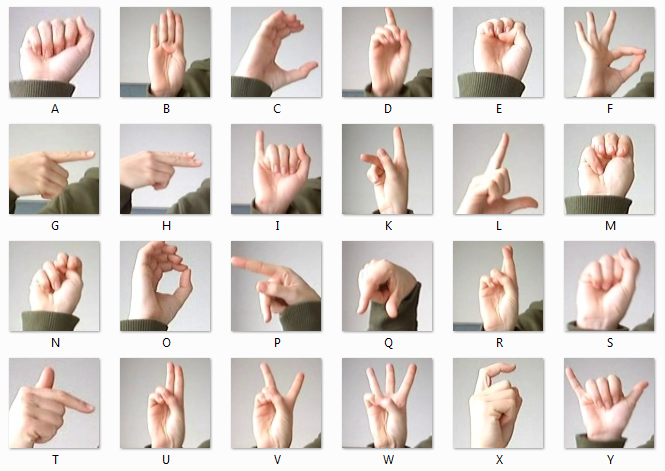

In [3]:
from IPython.display import Image, display
display(Image(filename = '/kaggle/input/sign-language-mnist/amer_sign2.png'))

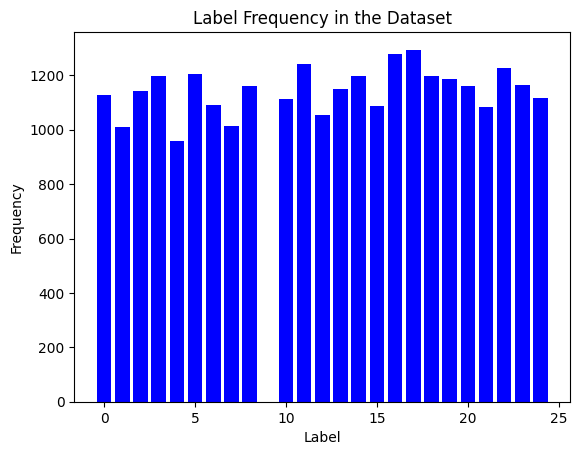

In [4]:
labels = train_df['label']

# Count the frequency of each label
label_counts = labels.value_counts().sort_index()

# Plot the bar chart
plt.bar(label_counts.index, label_counts.values, color='blue')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Frequency in the Dataset')
plt.show()

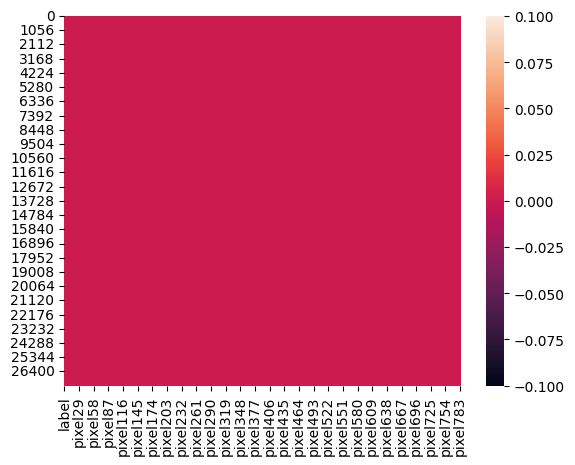

In [5]:
sns.heatmap(train_df.isnull())
plt.show()

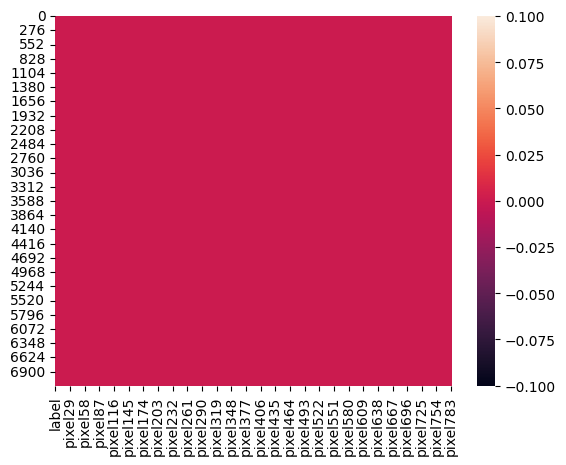

In [6]:
sns.heatmap(test_df.isnull())
plt.show()

In [7]:
train_df.shape,test_df.shape

((27455, 785), (7172, 785))

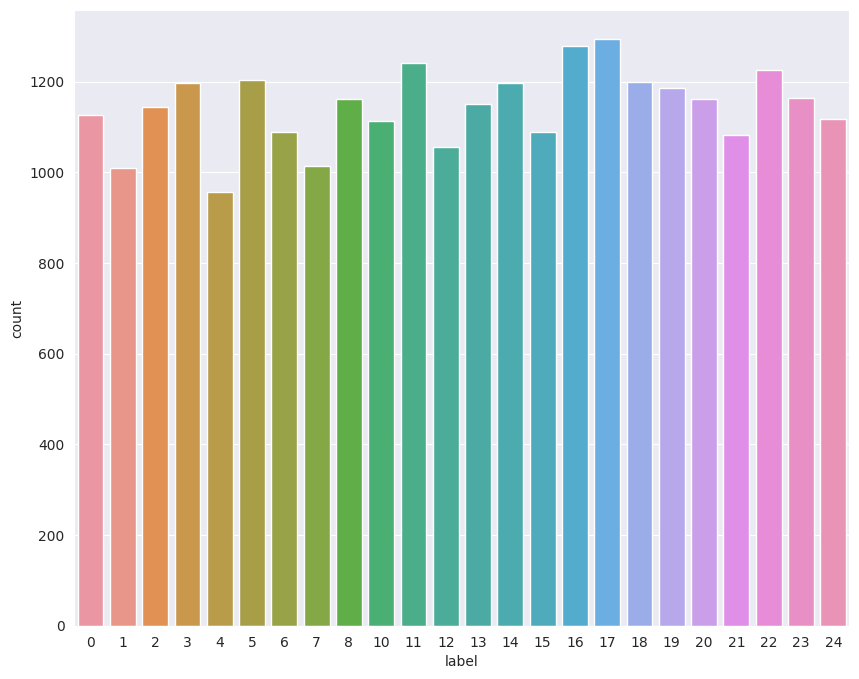

In [8]:
plt.figure(figsize = (10,8)) 
sns.set_style("darkgrid")
sns.countplot(data = train_df, x = train_df['label'])
plt.show()

In [9]:
y_train = train_df['label']
y_test = test_df['label']

x_train = train_df.drop('label',axis=1)
x_train = np.array(x_train,dtype='float32')/255

x_test = test_df.drop('label',axis=1)
x_test = np.array(x_test,dtype='float32')/255

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05,shuffle=True)

In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [12]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [13]:
x_train.shape ,x_test.shape

((26082, 28, 28, 1), (7172, 28, 28, 1))

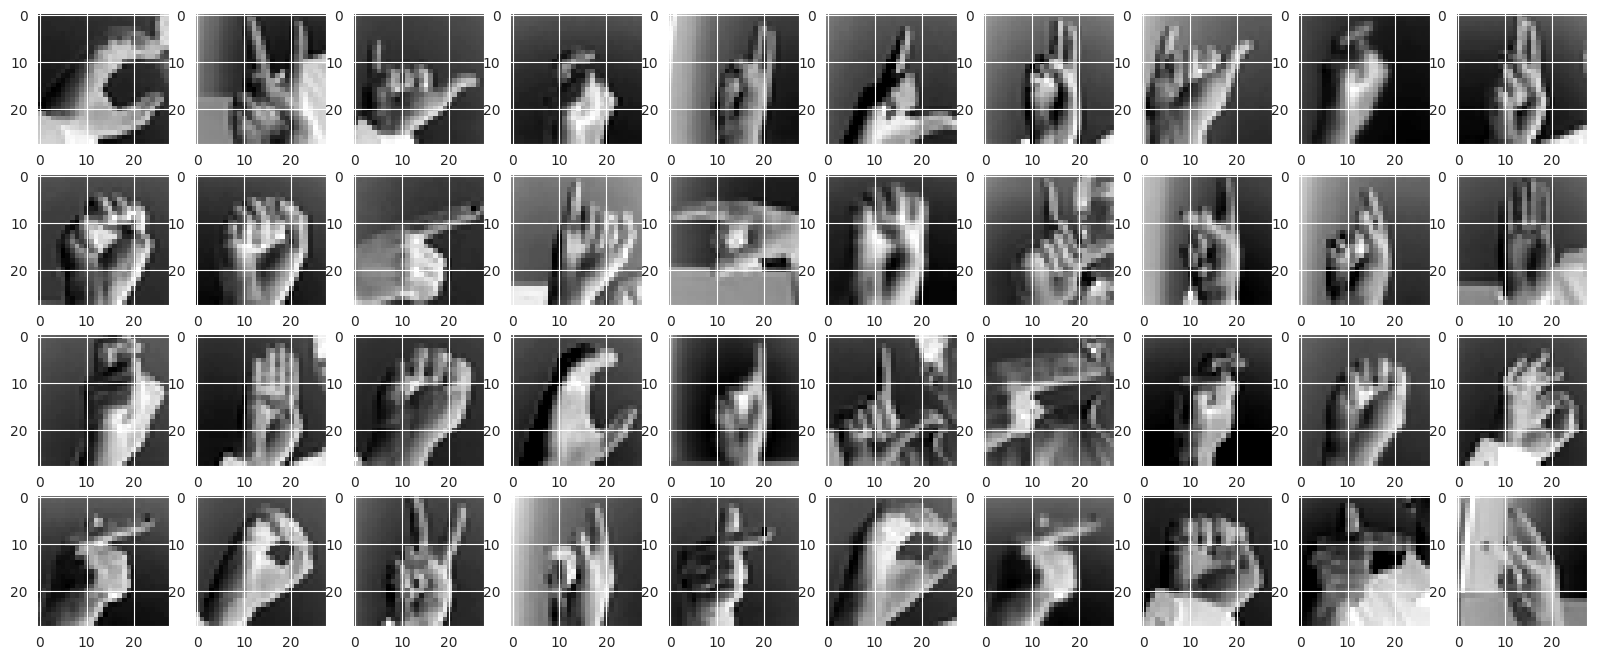

In [14]:
plt.figure(figsize=(20, 8))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray_r')
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
model = Sequential()

2024-02-07 18:28:36.623983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 18:28:36.624096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 18:28:36.793218: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [17]:
model.add(Conv2D(45, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), strides = 1, padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides = 2, padding = 'same'))

model.add(Conv2D(55, kernel_size=(3,3), strides=1, padding='same', activation='relu'))

model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 45)        450       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 45)        180       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 45)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 55)        22330     
                                                                 
 dropout (Dropout)           (None, 14, 14, 55)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 55)        2

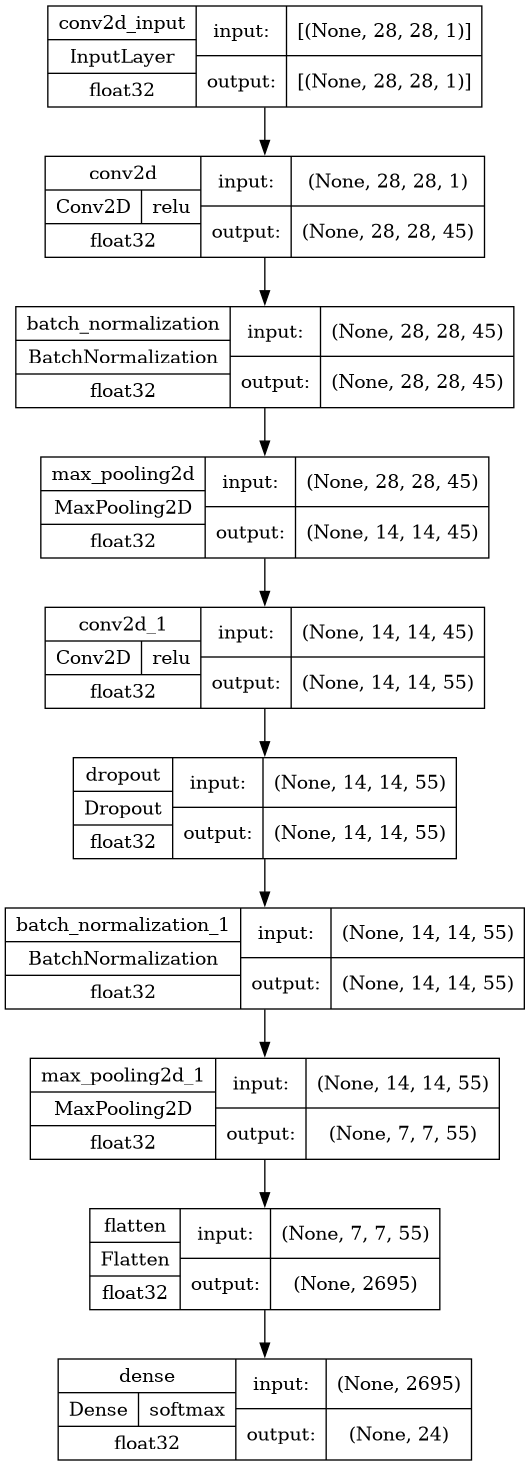

In [18]:
import tensorflow as tf
model_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

In [19]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.1 MB/s eta 0:00:00


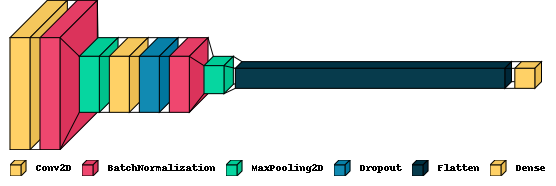

In [20]:
import visualkeras
visualkeras.layered_view(model, legend = True)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
hist=model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


2024-02-07 18:29:05.565207: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707330548.548588      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


204/204 [==============================] - 8s 12ms/step - loss: 0.4110 - accuracy: 0.8916 - val_loss: 3.0641 - val_accuracy: 0.1049
Epoch 2/10
204/204 [==============================] - 2s 9ms/step - loss: 0.0106 - accuracy: 0.9997 - val_loss: 1.7860 - val_accuracy: 0.4495
Epoch 3/10
204/204 [==============================] - 2s 9ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3846 - val_accuracy: 0.8968
Epoch 4/10
204/204 [==============================] - 2s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2627 - val_accuracy: 0.9307
Epoch 5/10
204/204 [==============================] - 2s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2510 - val_accuracy: 0.9271
Epoch 6/10
204/204 [==============================] - 2s 9ms/step - loss: 8.8562e-04 - accuracy: 1.0000 - val_loss: 0.2615 - val_accuracy: 0.9269
Epoch 7/10
204/204 [==============================] - 2s 9ms/step - loss: 6.0430e-04 - accuracy: 1.0000 - val_loss: 0.2519 - val_accuracy: 0.9306
Epoch 8/

In [23]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 2ms/step - loss: 0.2530 - accuracy: 0.9290
Accuracy of the model is -  92.90295839309692 %


In [24]:
historyDf = pd.DataFrame(hist.history)

<Axes: >

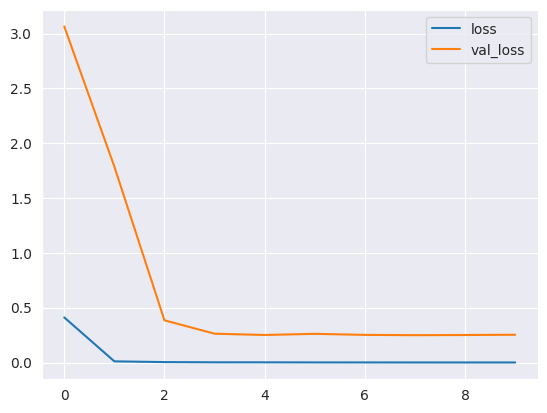

In [25]:
historyDf.loc[:, ['loss', 'val_loss']].plot()

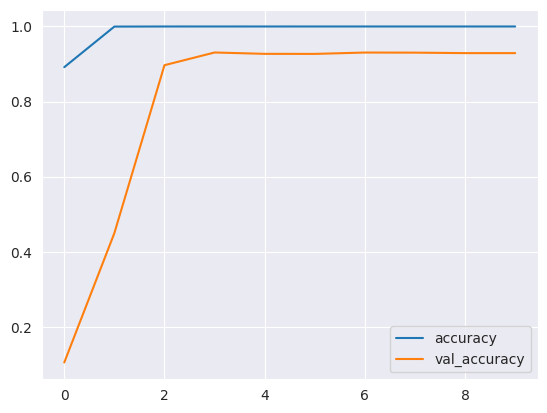

In [26]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

225/225 [==============================] - 0s 2ms/step


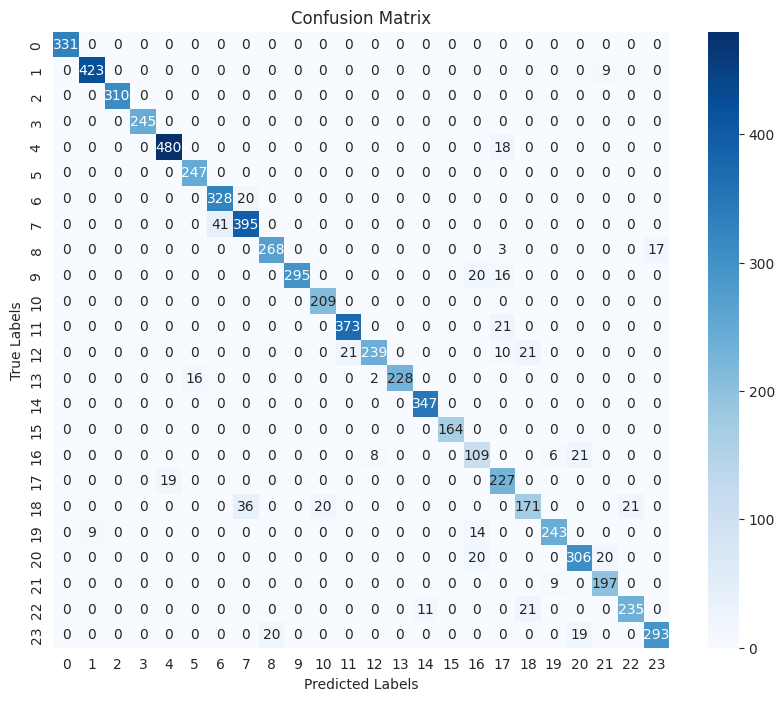

In [27]:
from sklearn.metrics import confusion_matrix
# Assuming your model predicts probabilities for each class
Y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
Y_pred = Y_pred_prob.argmax(axis=1)

# Ensure y_test is a 1D array containing the true labels
y_test_labels = y_test.argmax(axis=1) if len(y_test.shape) > 1 else y_test

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_labels, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=range(24), yticklabels=range(24))  # Assuming 24 classes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()